In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')

In [3]:
ticker_price_moment_exit = pd.read_hdf("ticker_price_moment_exit.hd5")
ticker_price_moment_exit.info()
ticker_price_moment_exit.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52622 entries, 0 to 54760
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker         52622 non-null  object
 1   bidPrice       52622 non-null  object
 2   bidSize        52622 non-null  object
 3   askPrice       52622 non-null  object
 4   askSize        52622 non-null  object
 5   lastUpdated    52622 non-null  object
 6   lastSalePrice  52622 non-null  object
 7   lastSaleSize   52622 non-null  object
 8   lastSaleTime   52622 non-null  object
 9   volume         52622 non-null  object
 10  current_price  52622 non-null  object
 11  timestamp      52622 non-null  object
 12  news_id        52622 non-null  object
dtypes: object(13)
memory usage: 5.6+ MB


,ticker,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,current_price,timestamp,news_id
0,VS,0.0,0.0,0.0,0.0,1629316800000.0,4.33,6.0,1629316790023,46.0,4.24,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
1,VSSYW,0.0,0.0,0.0,0.0,1628193600000.0,1.55,25.0,1628178157384,25.0,2.08,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
3,BTBT,0.0,0.0,0.0,0.0,1632513600000.0,9.44,1.0,1632513582057,38333.0,9.46,1632747622,0007ea6c22fc24e1f34021185ad07e4e
4,CAN,0.0,0.0,0.0,0.0,1632515322537,6.16,80.0,1632514484013,453506.0,6.11,1632747622,0007ea6c22fc24e1f34021185ad07e4e
5,HVBT,0.0,0.0,0.0,0.0,1631563200000.0,3.06,300.0,1631563186154,33347.0,3.06,1632747622,0007ea6c22fc24e1f34021185ad07e4e
6,OLB,0.0,0.0,0.0,0.0,1632513600000.0,4.23,100.0,1632513598460.0,3823.0,4.25,1632747622,0007ea6c22fc24e1f34021185ad07e4e
7,BBBY,0.0,0.0,0.0,0.0,1631649600272,23.82,6.0,1631649599149,62985.0,23.83,1631707209,00091f238ca72bd41d8baf14eb089f51
8,KFS,0.0,0.0,0.0,0.0,1633118400000.0,5.17,100.0,1633096381737,300.0,5.36,1633350615,000987a19572364448369fdaaf5d7d20
9,AFRM,0.0,0.0,0.0,0.0,1632254400987,108.105,28.0,1632254395027,189948.0,108.11,1632315622,000cd8ff9081aaf24065fa357b186b02
10,NATR,0.0,0.0,17.45,133.0,1630504790206,17.33,100.0,1630504717922,140.0,17.33,1630504816,000de19c850fb98b434e5adf871f6618


In [4]:
scores_retrotesting = pd.read_hdf("scores_retrotesting.hd5")
fin_min=scores_retrotesting["final_score"].min() ##данные от -14 до 5 - очень странная расбалансировка
fin_max=scores_retrotesting["final_score"].max()
scores_retrotesting = scores_retrotesting[scores_retrotesting['final_score'] >3 ]


scores_retrotesting.info()
scores_retrotesting.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 77 to 35677
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   observation_id                                       80 non-null     int64  
 1   news_id                                              80 non-null     object 
 2   10_True_0.05                                         80 non-null     float64
 3   ticker                                               80 non-null     object 
 4   final_score                                          80 non-null     float64
 5   final_probabilities                                  80 non-null     float64
 6   probability_of_conversion_calibrated_by_source.name  80 non-null     float64
 7   probability                                          80 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.6+ KB


,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
77,2640,1256a14eb635a4d5ce7265db89b17e1a,0.0,GP,3.602661,0.973472,0.263349,0.247648
274,8648,3d0d5cf485f830a3f504939507835c04,0.0,AEY,3.062563,0.955322,0.231295,0.209504
365,11149,4e1c384c5bc07bc25d34dedb71549b1f,0.0,VTSI,3.987785,0.981797,0.293361,0.277548
539,16862,76192c3f79fd20595a9789299fc05c5a,0.0,XSPA,3.027966,0.953822,0.229162,0.207214
678,22025,9a3f60abf541b9844120b280b85b4c2b,0.0,DSP,3.433080,0.968723,0.255003,0.235189
687,22499,9dbc000e6a6967e7d644af8bcb8cee2a,0.0,EVOL,3.875282,0.979673,0.285313,0.268588
749,24118,a90f42357d3174a3b8236e3d9e6cc693,1.0,CYBR,3.669652,0.975148,0.234024,0.252691
903,28644,c9f9ac52368334f51dcb49d928c12776,1.0,CASI,3.437561,0.968858,0.252667,0.235512
1025,32366,e3d59c6cf70deadd4126a7ed9cdc4d1b,0.0,AZEK,3.777544,0.977633,0.240732,0.260953
1040,32870,e71fdbb8d05e33d248641d74ce3751af,0.0,EMAN,3.508962,0.970942,0.260051,0.240710


In [6]:

all_files = glob.glob("intraday_data/*.hd5")
li = []
#print(all_files)
for filename in all_files:
    df = pd.read_hdf(filename, index_col=None, header=0)
    li.append(df)

intraday = pd.concat(li, axis=0, ignore_index=True)
#intraday =pd.read_hdf('./test/intraday_data/2021-08-13.hd5')
intraday.info()
intraday.tail(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19497010 entries, 0 to 19497009
Data columns (total 9 columns):
 #   Column         Dtype                  
---  ------         -----                  
 0   open           float64                
 1   high           float64                
 2   close          float64                
 3   low            float64                
 4   volume         float64                
 5   time           int64                  
 6   formated time  datetime64[ns, tzutc()]
 7   ticker         object                 
 8   autofilled     bool                   
dtypes: bool(1), datetime64[ns, tzutc()](1), float64(5), int64(1), object(1)
memory usage: 1.2+ GB


,open,high,close,low,volume,time,formated time,ticker,autofilled
19496980,15.7950,NaN,15.7950,NaN,NaN,1633731420,2021-10-08 22:17:00+00:00,DENN,True
19496981,15.7950,NaN,15.7950,NaN,NaN,1633731480,2021-10-08 22:18:00+00:00,DENN,True
19496982,15.7950,NaN,15.7950,NaN,NaN,1633731540,2021-10-08 22:19:00+00:00,DENN,True
19496983,15.7950,NaN,15.7950,NaN,NaN,1633731600,2021-10-08 22:20:00+00:00,DENN,True
19496984,15.7950,NaN,15.7950,NaN,NaN,1633731660,2021-10-08 22:21:00+00:00,DENN,True
19496985,15.7950,NaN,15.7950,NaN,NaN,1633731720,2021-10-08 22:22:00+00:00,DENN,True
19496986,15.7950,NaN,15.7950,NaN,NaN,1633731780,2021-10-08 22:23:00+00:00,DENN,True
19496987,15.7950,NaN,15.7950,NaN,NaN,1633731840,2021-10-08 22:24:00+00:00,DENN,True
19496988,15.7950,NaN,15.7950,NaN,NaN,1633731900,2021-10-08 22:25:00+00:00,DENN,True
19496989,15.7950,NaN,15.7950,NaN,NaN,1633731960,2021-10-08 22:26:00+00:00,DENN,True


In [7]:
def profit(in_money,data,time_new_out,time_in,time_out):
    t1 = time_new_out+time_in*60
    t1 = t1 - (t1 % 60)
    t_in = data[data["time"]==t1]

    if( t_in.empty):
        return 0
    stock = in_money/t_in["close"].values[0]
    t2 = (time_new_out + time_out*60)
    t2 = t2 - (t2 % 60)
    t_out = data[data["time"]== t2]
    if(t_out.empty):
        return 0
    result = stock*(t_out["close"].values[0])
    #print(result - in_money)
    return (result - in_money)/(in_money)*100
    
    

In [8]:
profit(1507, "2021-08-13")

TypeError: profit() missing 3 required positional arguments: 'time_new_out', 'time_in', and 'time_out'

In [12]:
profits  = np.zeros((6,6))

print(profit)
in_time  = [0,1,2,3,4,5] #uniq
out_time = [1,2,5,10,15,20] #uniq

<function profit at 0x000001FC0B2A2DC0>


In [13]:

for ind,data in scores_retrotesting.iterrows() :
   # print(data["news_id"],data["ticker"])
    buf = ticker_price_moment_exit[ticker_price_moment_exit["ticker"] == data["ticker"]]
    buf =  buf[buf["news_id"]==data["news_id"]]
    # для всех найдейных 
    if(not buf.empty):
        intraday2 = intraday[intraday['ticker'] == buf["ticker"].values[0] ]
        if(not intraday2.empty):
            for i in in_time:
                for j in out_time :
                    if(i<=j):
                        profits[in_time.index(i)][out_time.index(j)] += profit(1000,intraday2,buf["timestamp"].values[0],i,j)
                
        

-7.881405486181179


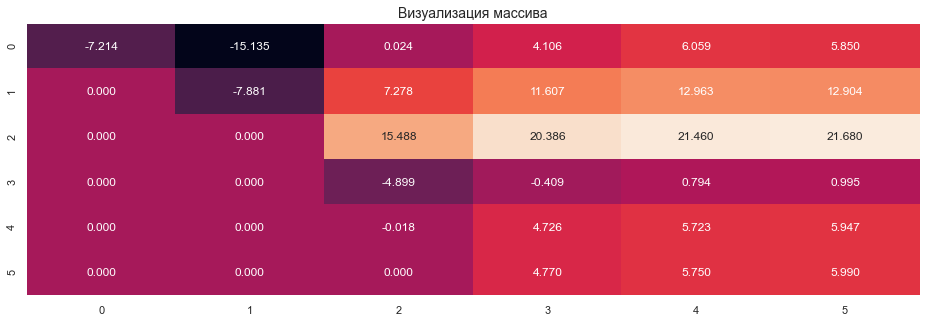

In [14]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(16, 5))
ax = sns.heatmap(profits, annot=True, fmt=".3f", cbar=None)
plt.title("Визуализация массива",fontsize=14)
print(profits[1][1])
#plt.savefig("visualize_numpy_array.png", bbox_inches='tight', dpi=100)

plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-15-103f9f9be799>, line 2)

In [ ]:
## второй этап

In [16]:
scores_retrotesting = pd.read_hdf("./test/scores_retrotesting.hd5")
scores_retrotesting = scores_retrotesting[scores_retrotesting['final_score'] >3 ]
scores_retrotesting.head(5)

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
77,2640,1256a14eb635a4d5ce7265db89b17e1a,0.0,GP,3.602661,0.973472,0.263349,0.247648
274,8648,3d0d5cf485f830a3f504939507835c04,0.0,AEY,3.062563,0.955322,0.231295,0.209504
365,11149,4e1c384c5bc07bc25d34dedb71549b1f,0.0,VTSI,3.987785,0.981797,0.293361,0.277548
539,16862,76192c3f79fd20595a9789299fc05c5a,0.0,XSPA,3.027966,0.953822,0.229162,0.207214
678,22025,9a3f60abf541b9844120b280b85b4c2b,0.0,DSP,3.433080,0.968723,0.255003,0.235189


In [17]:
scores_retrotesting = pd.read_hdf("./test/scores_retrotesting.hd5")
scores_retrotesting = scores_retrotesting[scores_retrotesting['final_score'] >3 ]
scores_retrotesting.head(5)

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
77,2640,1256a14eb635a4d5ce7265db89b17e1a,0.0,GP,3.602661,0.973472,0.263349,0.247648
274,8648,3d0d5cf485f830a3f504939507835c04,0.0,AEY,3.062563,0.955322,0.231295,0.209504
365,11149,4e1c384c5bc07bc25d34dedb71549b1f,0.0,VTSI,3.987785,0.981797,0.293361,0.277548
539,16862,76192c3f79fd20595a9789299fc05c5a,0.0,XSPA,3.027966,0.953822,0.229162,0.207214
678,22025,9a3f60abf541b9844120b280b85b4c2b,0.0,DSP,3.433080,0.968723,0.255003,0.235189


In [15]:
max_profit(12-08-13, 2, 13)

SyntaxError: invalid token (<ipython-input-15-8cc670a58c30>, line 1)

In [9]:
def max_profit(data,time_new_out,interval):
    max_diff = 0
    t1 = time_new_out
    t1 = t1 - (t1 % 60)
    t_in = data[data["time"]==t1]
    if(t_in.empty):
        t_in = data[data["time"]==data["time"].max()]
    for i in range(interval):
        t2 = (t1 + i*60)
        t_out = data[data["time"]== t2]
        if(t_out.empty):
            t_out = data[data["time"]==data["time"].max()]
            #print(t_out)
        buf = abs(t_in['close'].values[0] - t_out['close'].values[0])/ t_out['close'].values[0]
        if(max_diff < buf):
            max_diff = buf
    return max_diff
    

In [19]:
distribution = []
for ind,data in scores_retrotesting.iterrows() :
   # print(data["news_id"],data["ticker"])
    buf = ticker_price_moment_exit[ticker_price_moment_exit["ticker"] == data["ticker"]]
    buf =  buf[buf["news_id"]==data["news_id"]]
    # для всех найдейных 
    if(not buf.empty):
        intraday2 = intraday[intraday['ticker'] == buf["ticker"].values[0] ]
        if(not intraday2.empty):
            distribution.append(max_profit(intraday2,buf['timestamp'].values[0],10))

48


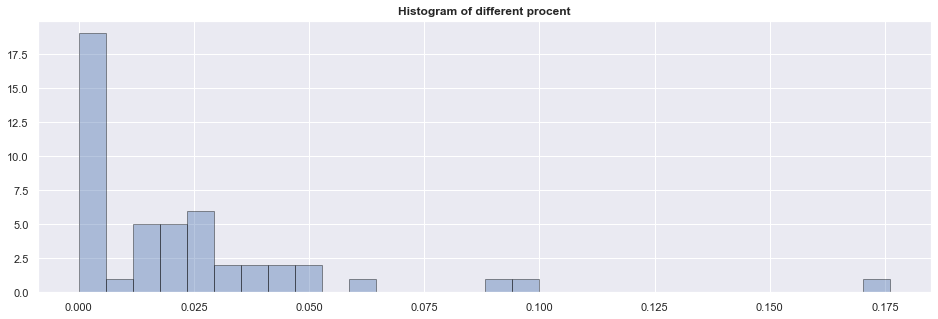

In [20]:
print(len(distribution))
fig = plt.figure(figsize=(16, 5))

sns.distplot(distribution, hist=True, kde=False, 
             bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of different procent", weight="bold")

plt.show()

In [21]:
for i in range(len(distribution)):
    if(distribution[i] >= 0.05):
        distribution[i] = 1
    else:
        distribution[i] = 0

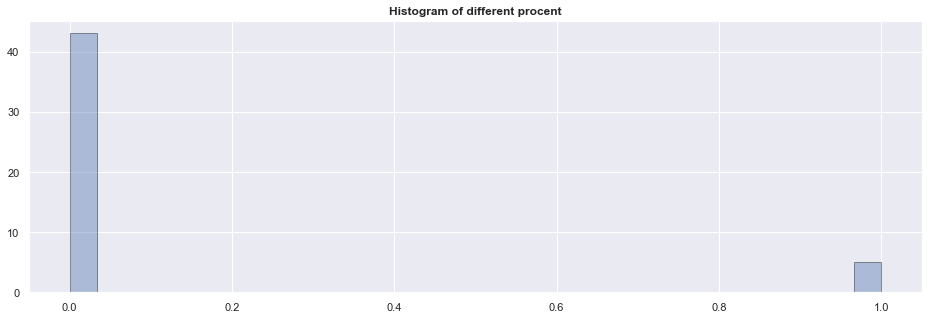

In [22]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(distribution, hist=True, kde=False, 
             bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of different procent ", weight="bold")

plt.show()

In [23]:
#третий этап - смотрим по отфильтрованному скору
scores_retrotesting = pd.read_hdf("./test/scores_retrotesting.hd5")
scores_retrotesting = scores_retrotesting[scores_retrotesting['final_score'] >2]
scores_retrotesting.head(5)
score_min = scores_retrotesting['final_score'].min()
score_max = scores_retrotesting['final_score'].max()
print(score_min)
print(score_max)


2.0069363340090827
5.159715890644274


In [36]:
##
filtr = np.linspace(score_min,score_max,20)
n = len(filtr)-2
distribution = []
for i in range(n):
    distr = []
    scores_retrotesting2 = scores_retrotesting[scores_retrotesting['final_score'] >filtr[i]] 
    scores_retrotesting2 = scores_retrotesting2[scores_retrotesting2['final_score'] <filtr[i+1]] 
    for ind,data in scores_retrotesting2.iterrows() :
   # print(data["news_id"],data["ticker"])
        buf = ticker_price_moment_exit[ticker_price_moment_exit["ticker"] == data["ticker"]]
        buf =  buf[buf["news_id"]==data["news_id"]]
    # для всех найдейных 
        if(not buf.empty):
            intraday2 = intraday[intraday['ticker'] == buf["ticker"].values[0] ]
            if(not intraday2.empty):
                distr.append(max_profit(intraday2,buf['timestamp'].values[0],10))
    distribution.append(distr)

2.0069363340090827 2.172872100147777


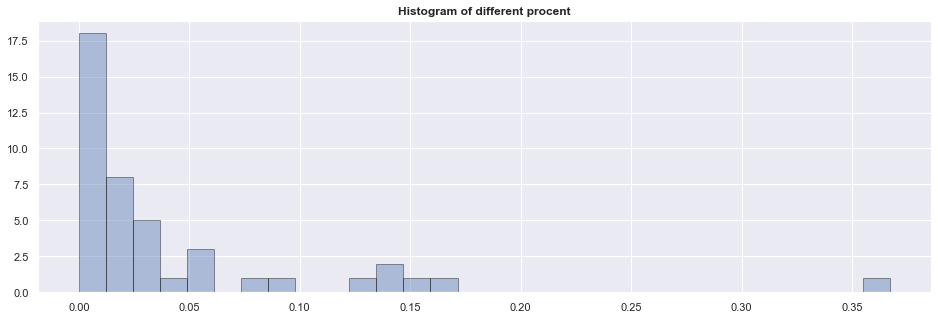

2.172872100147777 2.338807866286471


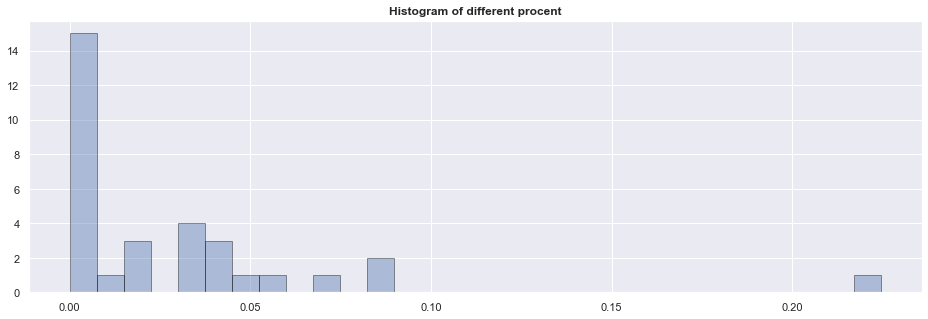

2.338807866286471 2.5047436324251655


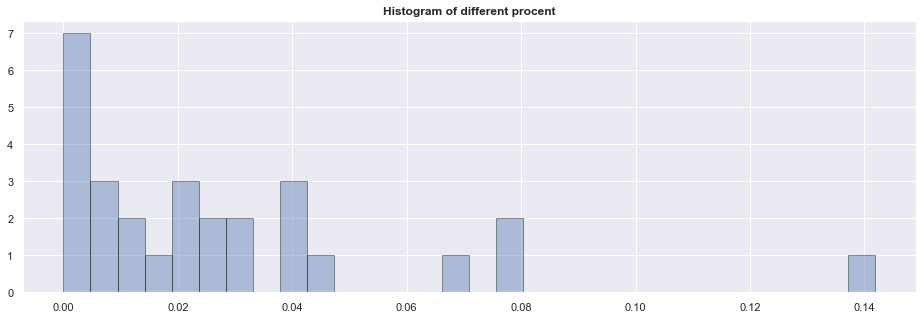

2.5047436324251655 2.67067939856386


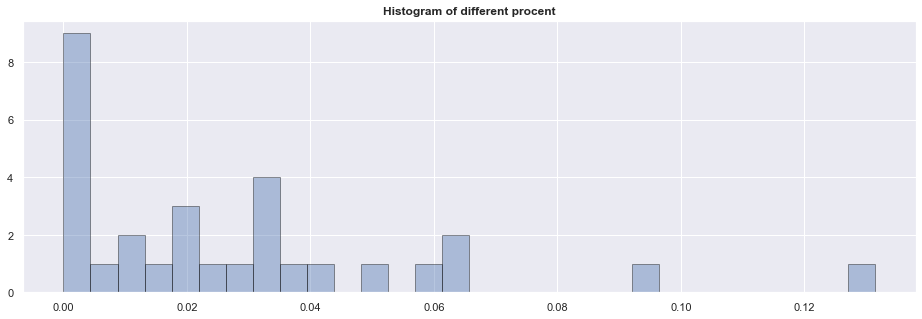

2.67067939856386 2.836615164702554


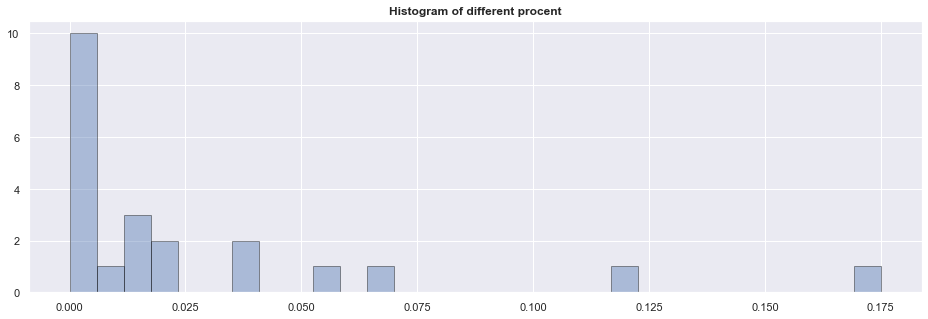

2.836615164702554 3.0025509308412484


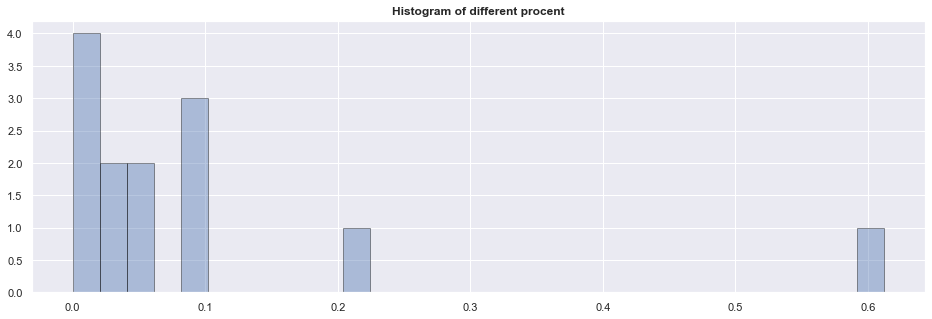

3.0025509308412484 3.168486696979943


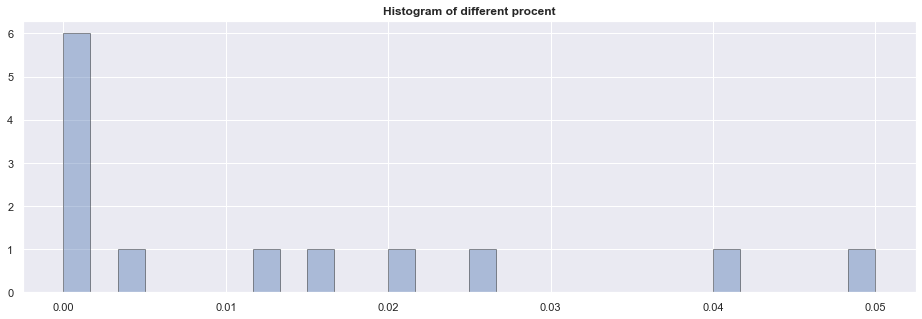

3.168486696979943 3.3344224631186368


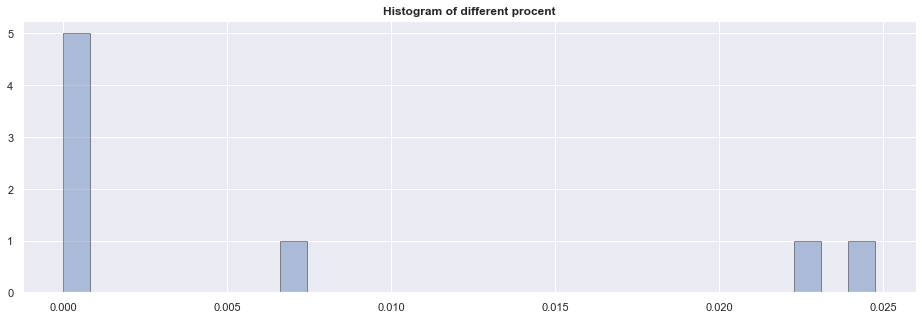

3.3344224631186368 3.500358229257331


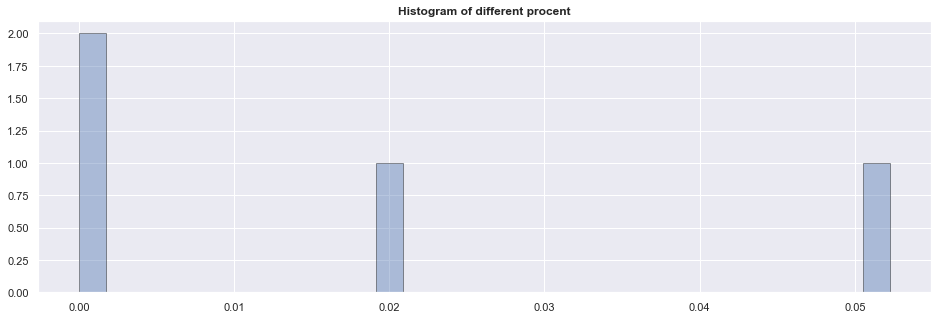

3.500358229257331 3.6662939953960256


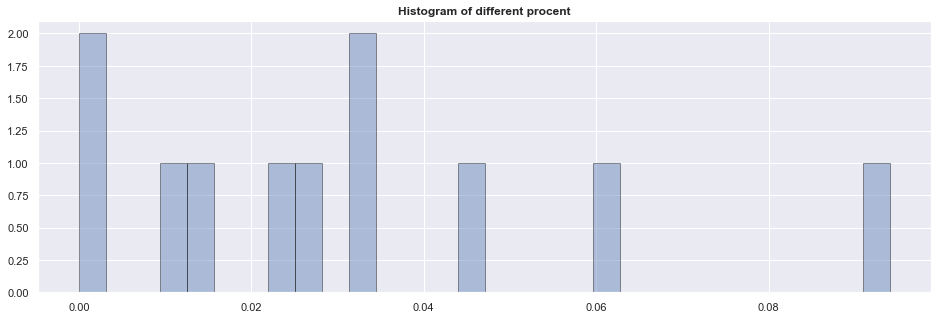

3.6662939953960256 3.8322297615347196


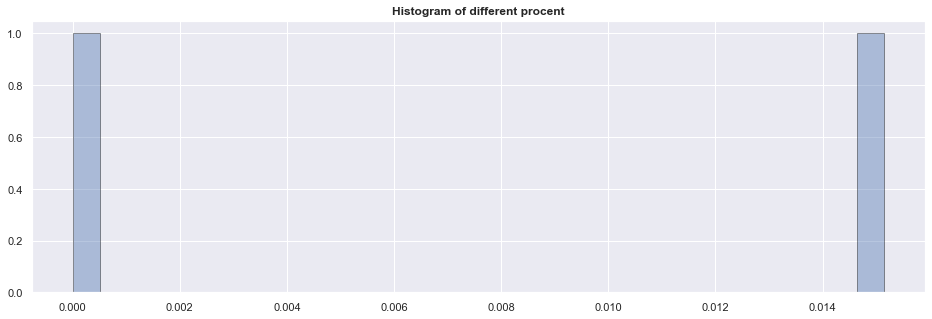

3.8322297615347196 3.998165527673414


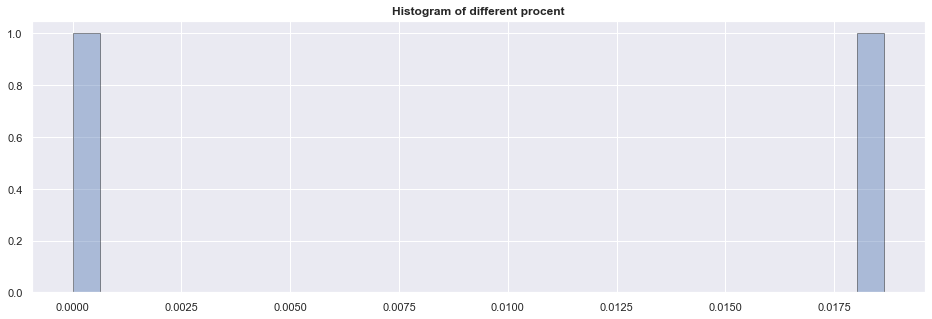

3.998165527673414 4.1641012938121085


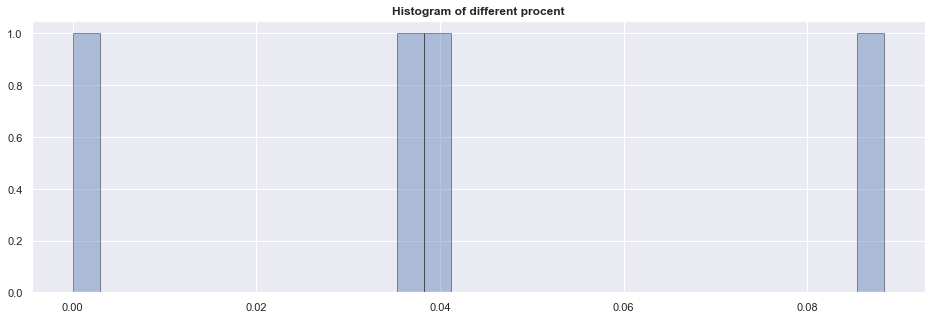

4.1641012938121085 4.3300370599508025


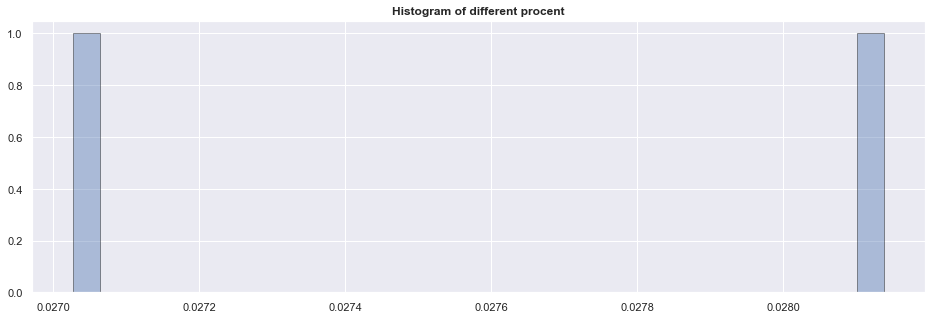

4.3300370599508025 4.495972826089497


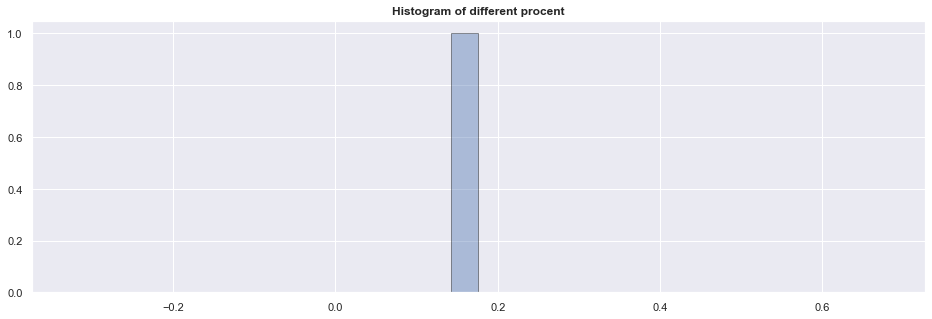

4.495972826089497 4.661908592228191


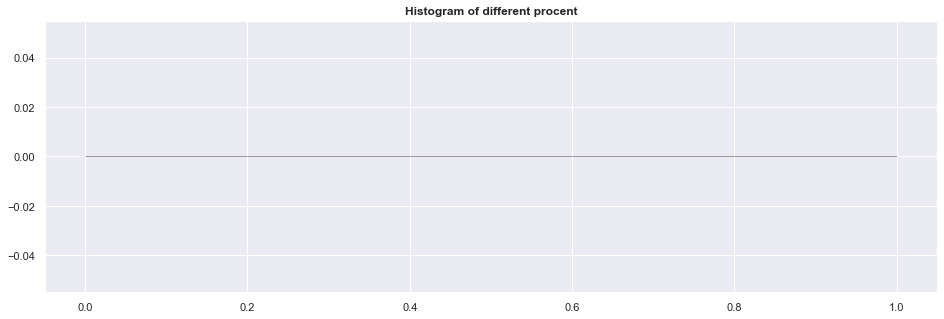

4.661908592228191 4.827844358366885


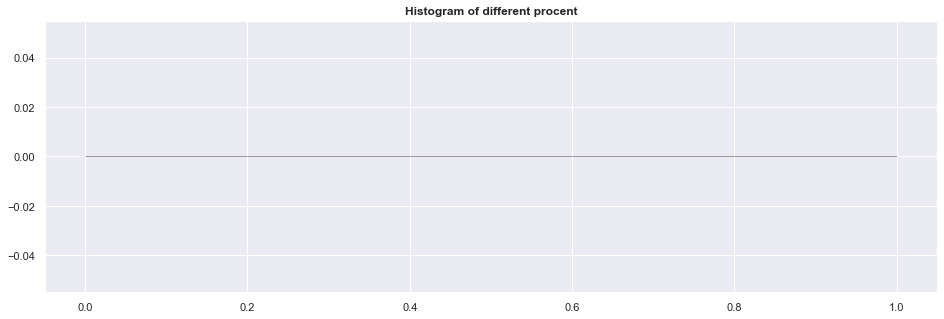

4.827844358366885 4.99378012450558


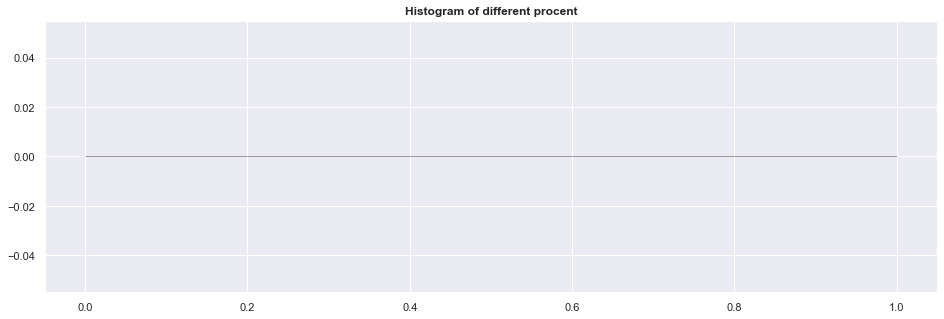

In [39]:
n = len(distribution)
for i in range(n):
    fig = plt.figure(figsize=(16, 5))

    sns.distplot(distribution[i], hist=True, kde=False, 
             bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    print(filtr[i],filtr[i+1])
    plt.title("Histogram of different procent", weight="bold")

    plt.show()